# Salary_hike : Build a prediction model for Salary_hike

In [41]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Data Description
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [15]:
#EDA and data visualization

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

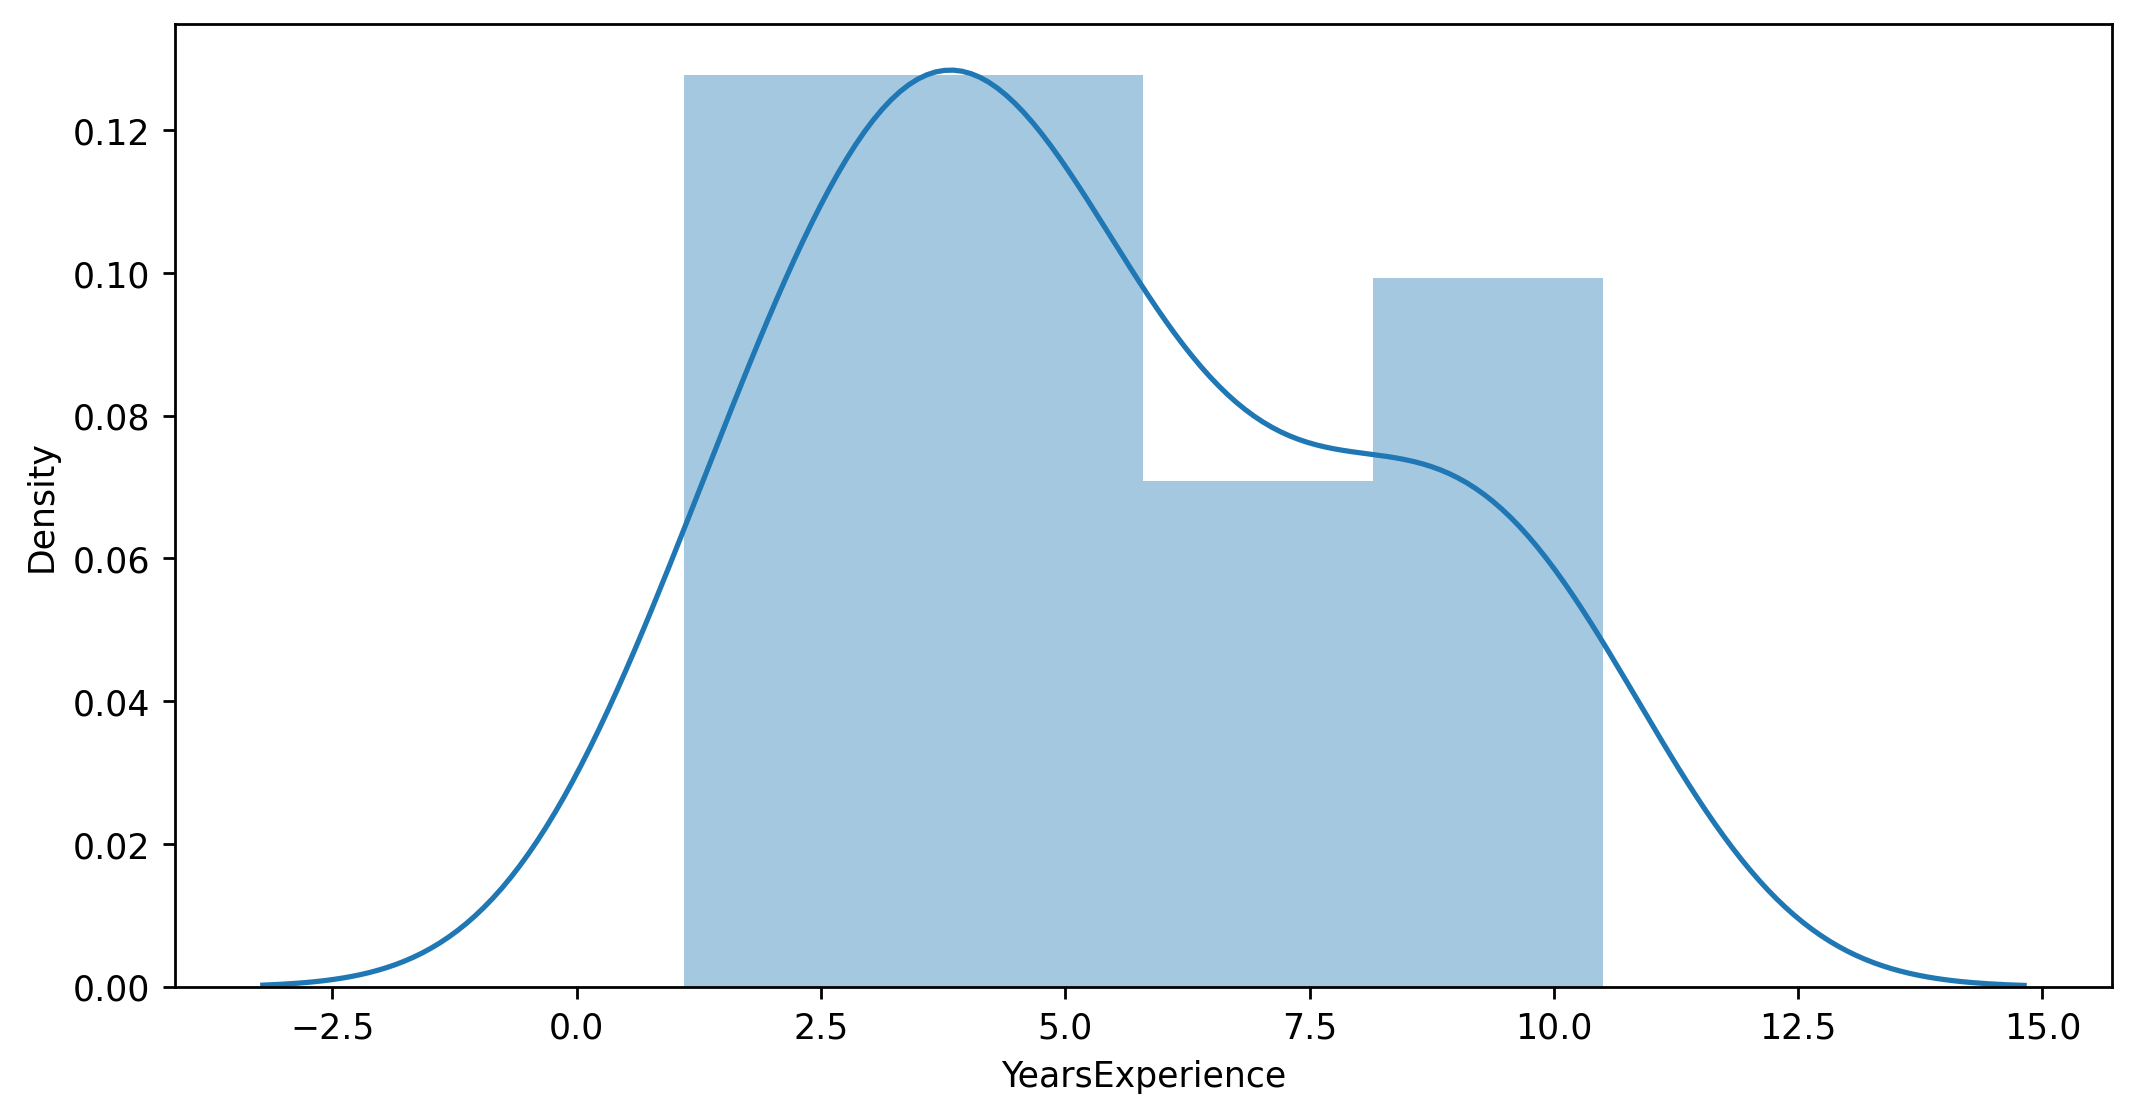

In [16]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

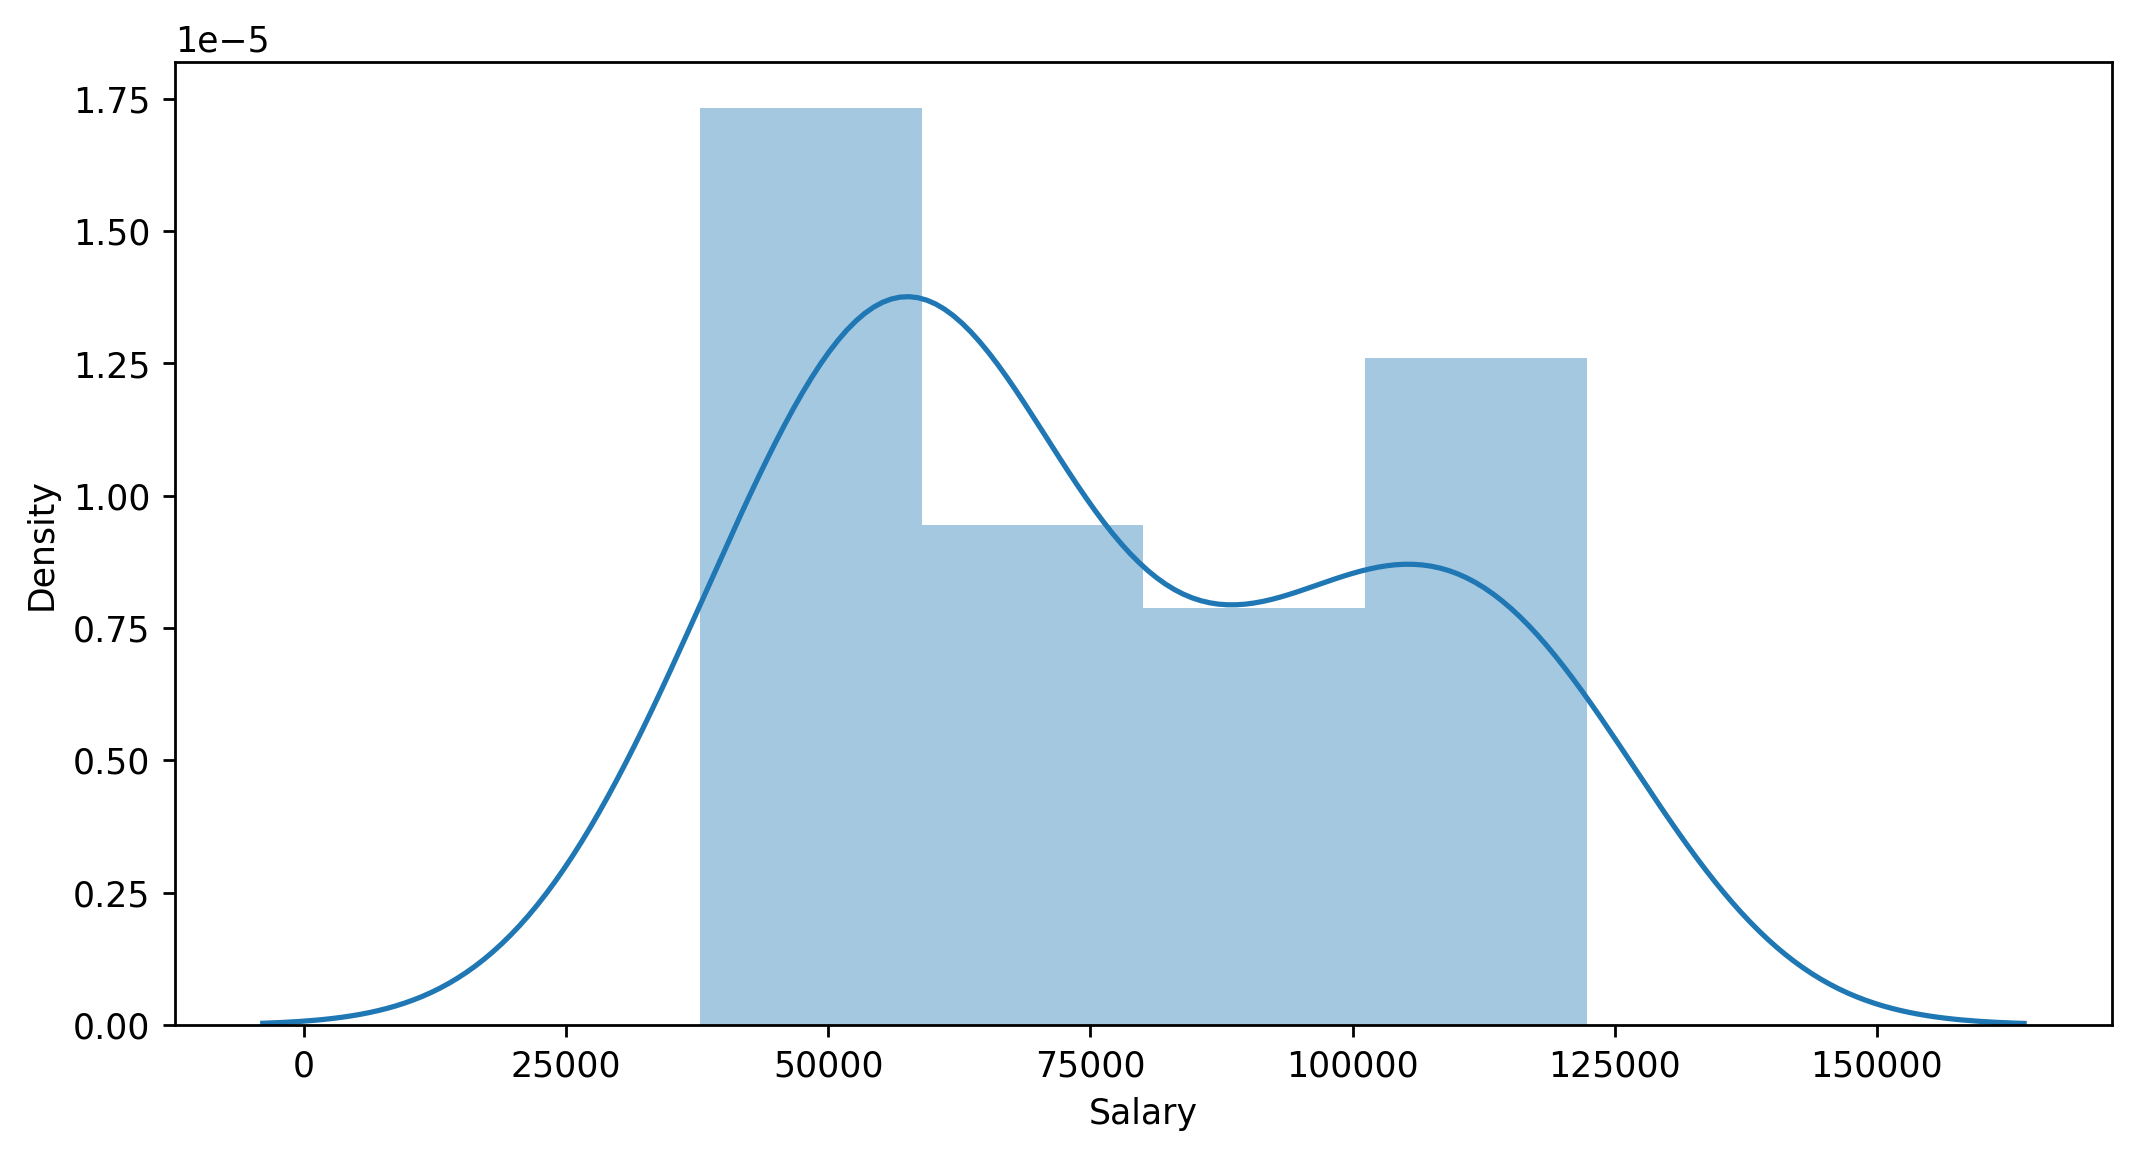

In [17]:
sns.distplot(df['Salary'])

In [18]:
#Feature Engineering

In [20]:
df = df.rename({'YearsExperience' : 'Experience'}, axis = 1)
df

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
df.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


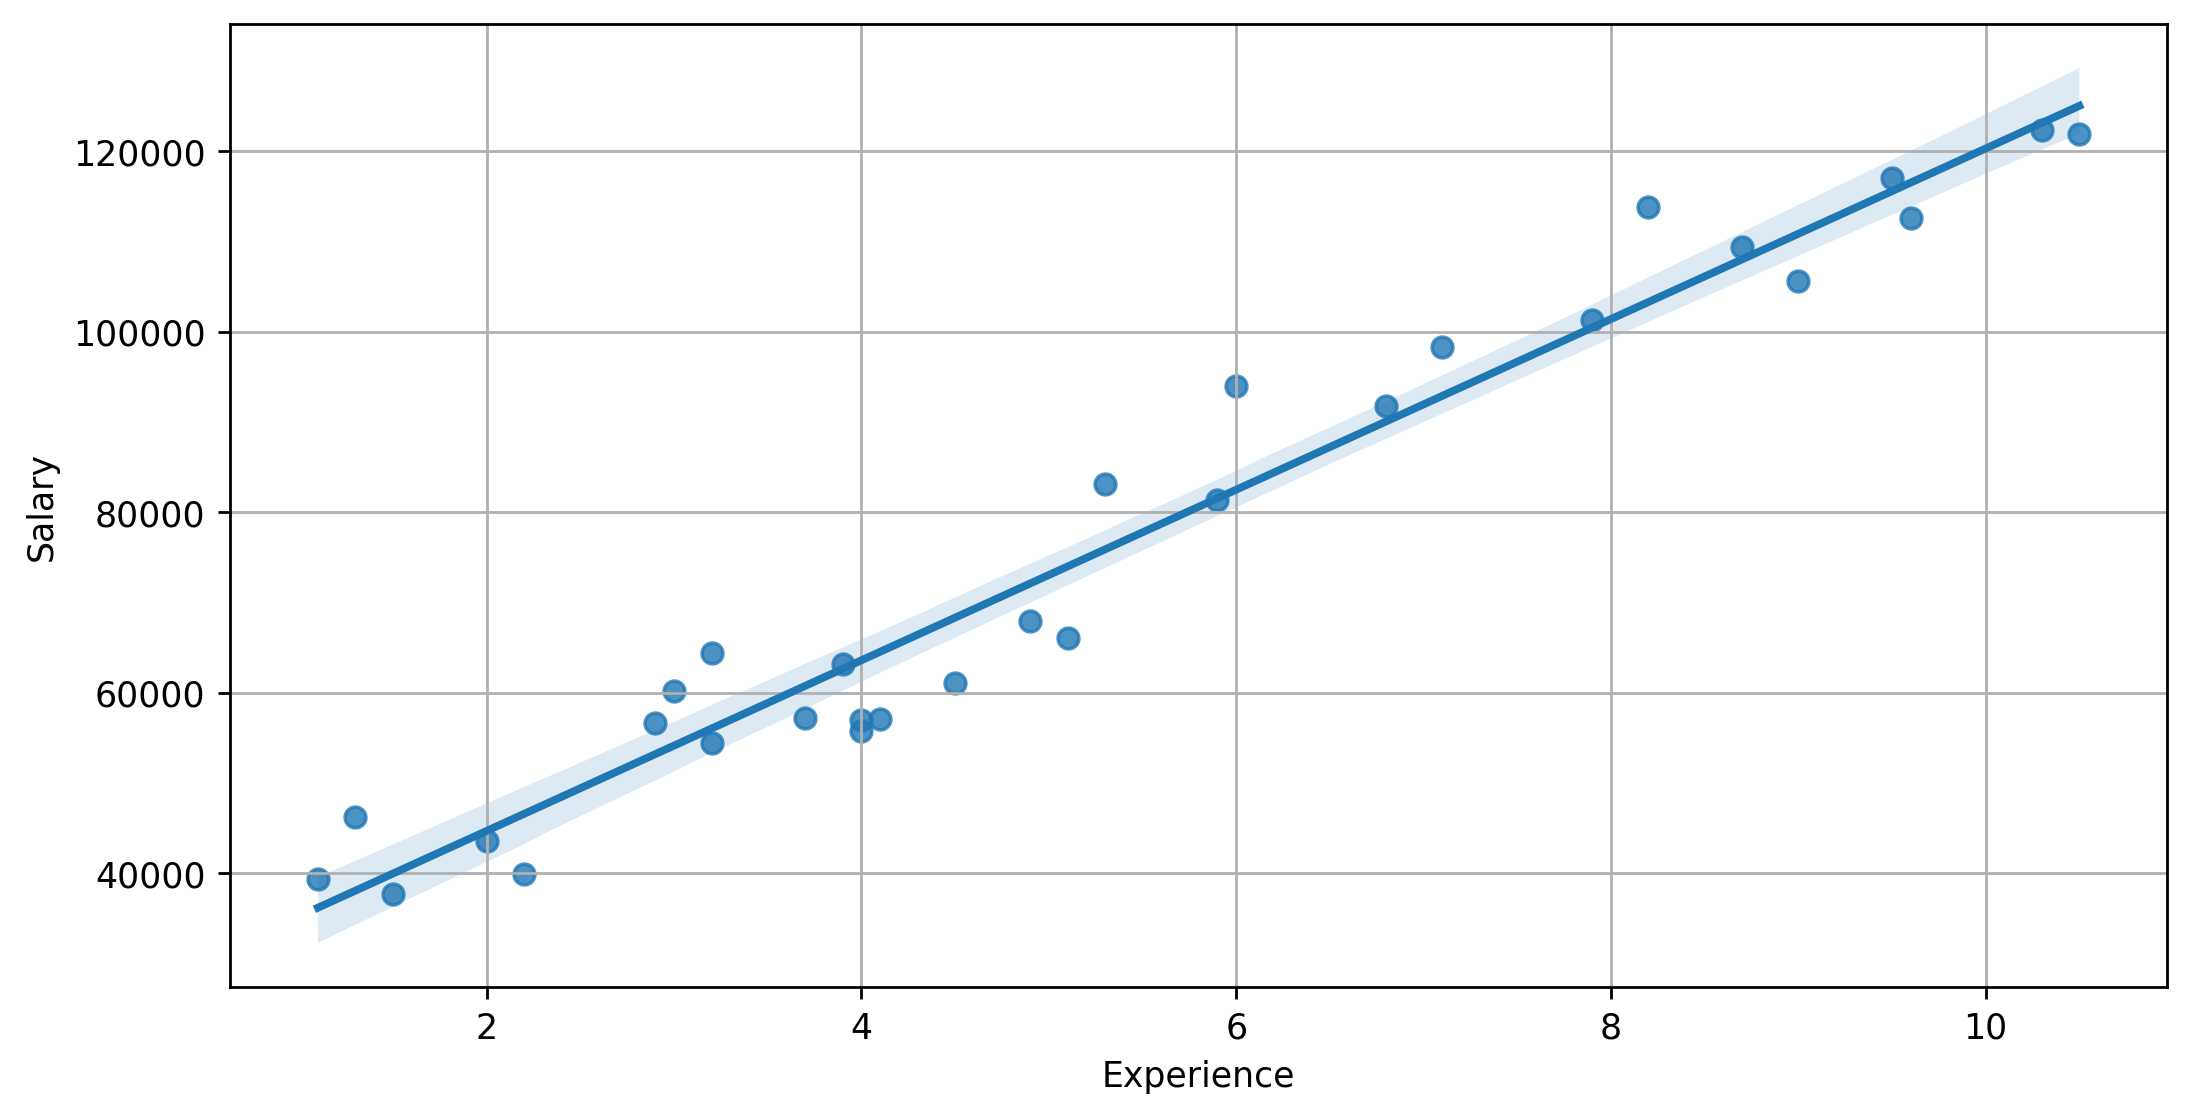

In [24]:
sns.regplot(x = df['Experience'], y = df['Salary'])
plt.grid()

In [25]:
#Model building

In [26]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols('Salary~Experience', data = df).fit()
model

In [28]:
#Model testing

In [30]:
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [32]:
model.tvalues, model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [34]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [35]:
#Model predictions

In [37]:
salary = (25792.200199) + (9449.962321)* (3)  #manual prediction for 3 years of experience
salary

54142.087162

In [38]:
new_data = pd.Series([3,5])   #auromatic prediction for 3 and 5 years of experience
new_data

0    3
1    5
dtype: int64

In [39]:
data_pred = pd.DataFrame(new_data, columns = ['Experience'])
data_pred

,Experience
0,3
1,5


In [40]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64